# AIML CA2 Part B Report - Clustering
Done By: Ang Miao Yi

___
# Importing Modules
___

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To ignore any warnings

# Importing tools for encoding
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importing models
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Importing other necessary modules
from numpy.random import uniform
from random import sample
import numpy as np
from math import isnan

___
# Background Information
___
We collected the information of 1000 students including their age, gender and subject scores. We want to group the students into multiple clusters so that we can cater needs for different students.

Teachers will know:
- which groups of student needs more help and attention
- which subject requires more lesson / more teaching
- which age group of students are poor in academic
- which gender does better than the other in which subjects
- understand the overall performance of students

This will help improve students' academic performance using this data.

___
# Import dataset and setup
___

In [2]:
# Import Student Performance Dataset
df = pd.read_csv('./CA2-Dataset/Student_Performance_dataset.csv', sep=',')
df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


Print the first 5 rows of the dataset tells us that the dataset contains 6 columns (features): 'Student ID', 'Gender', 'Age', 'English_Score', 'Math_Score', 'Science_Score'

___
# Exploratory data analysis (EDA)
___

In [3]:
# Make a copy of the dataframe for EDA
df_eda = df.copy()

In [4]:
# See the shape of the dataframe
df_eda.shape

(1000, 6)

In [5]:
# Information about the dataframe
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     1000 non-null   int64  
 1   Gender         1000 non-null   object 
 2   Age            1000 non-null   int64  
 3   English_Score  971 non-null    float64
 4   Math_Score     967 non-null    float64
 5   Science_Score  1000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [6]:
# Description of dataframe
df_eda.describe()

,Student_ID,Age,English_Score,Math_Score,Science_Score
count,1000.000000,1000.000000,971.000000,967.000000,1000.000000
mean,500.500000,14.970000,76.089598,76.660807,76.370000
std,288.819436,1.959832,12.767113,12.541226,12.866649
min,1.000000,12.000000,55.000000,55.000000,55.000000
25%,250.750000,13.000000,65.000000,66.000000,65.000000
50%,500.500000,15.000000,76.000000,76.000000,77.000000
75%,750.250000,17.000000,88.000000,87.500000,87.000000
max,1000.000000,18.000000,98.000000,98.000000,98.000000


In [7]:
# Checking for missing values
df_eda.isna().sum()

Student_ID        0
Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64

___
# Encoding
___

##### Different encoding methods:
1. One Hot Encoding (Most commonly used)
    - One Hot Encoding is suitable for nominal categorical variables, where the categories have no inherent order or relationship. It preserves all information about the categories and doesn’t introduce any ordinal relationship
    - Cons: One Hot Encoding is bad when there are multiple categories in a feature variable. In the case of our dataset, it seems that "Gender" have many categories: Bigender, Female, Genderfluid, Genderqueer, Male, Non-Binary, Polygender. Ideally for categorical features with less than 10 categories.
    - Hence, since the "Gender" variable only has 7 categories (<10), I will use this encoding method
2. Binary Encoding
    - Binary Encoding is like One Hot Encoding, where the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. Binary encoding works really well when there are a high number of categories. However, one hot encoding is a better method 
2. Label Encoding
    - Each category in a feautre variable is assigned a unique integer label. Categories are assigned integer values starting from 0.
    - Pros: Works well for features with only two categories
    - Cons: Machine learning algorithms may misinterpret the integer labels as having mathematical significance. 
    - But I will use this encoding method too, as it is suitable for some of the clustering methods.
3. Ordinal Encoding
    - Ordinal Encoding is similar to label encoding but allows you to explicitly define the mapping between categories and integer labels.
    - Pros: Allows the user to explicitly specify the order in case of ordinal variables
    - Cons: Not applicable for non-ordinal variables
    - When to use: The best option for ordinal features
    - Hence, I will not use this encoding method since I do not need to specify the order of the variables
4. Count Encoding
    - Count Encoding replaces each category with the count of how many times it appears in the dataset. This encoding technique can be useful when there’s a correlation between the frequency of a category and the target variable.
    - Since I do not wish to show the frequency of my data, I will not use this encoding method.
5. Target Encoding
    - Target Encoding calculate the mean of the target variable for each category and replace the category with its corresponding mean value.
    - Since there is no need to calculate the mean, I will not use this encoding method

##### Chosen Encoding Method: One Hot Encoding & Label Encoding

Source: https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b

Source: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [8]:
df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


In [9]:
# Encoding the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Droping Student_ID column
df = df.drop(['Student_ID'], axis=1)
df.head()

,Gender,Age,English_Score,Math_Score,Science_Score
0,2,18,64.0,56.0,60
1,2,12,89.0,71.0,97
2,2,18,69.0,69.0,80
3,2,17,60.0,72.0,97
4,5,13,71.0,76.0,76


___
# Imputation
___

In [10]:
# Impute the data
# =========================================================================================================================
# Instantiate the impute model
imp = SimpleImputer(strategy='mean')

# Fitting the model into the data to transform the data
df_imputed = imp.fit_transform(df)

# Convert the imputed array back into a dataframe
df = pd.DataFrame(df_imputed, columns=df.columns)

# Display Imputed Data and check if there are any missing values
display(df.head())
df.isna().sum()

,Gender,Age,English_Score,Math_Score,Science_Score
0,2.0,18.0,64.0,56.0,60.0
1,2.0,12.0,89.0,71.0,97.0
2,2.0,18.0,69.0,69.0,80.0
3,2.0,17.0,60.0,72.0,97.0
4,5.0,13.0,71.0,76.0,76.0


Gender           0
Age              0
English_Score    0
Math_Score       0
Science_Score    0
dtype: int64

We used simple imputer model to impute the missing values in the columns, using 'mean' of the columns to fill these missing values. After that, we checked that there are no missing values using ".isna().sum()"

___
# Standardization
___

1. Z-Score Standardization (Standard Scaler)
    - This is the best to use if your feature is normally distributed like salary or age.
    - Good for preserving the original distribution and shape.
    - Not good at handling outliers.
    - Gives Gaussian Distribution (normal distribution)
2. Min-Max Scaling
    - Useful when wanting to preserve the relationships between data points.
    - Prone to outliers

I will use histogram to see if my data is normally distributed

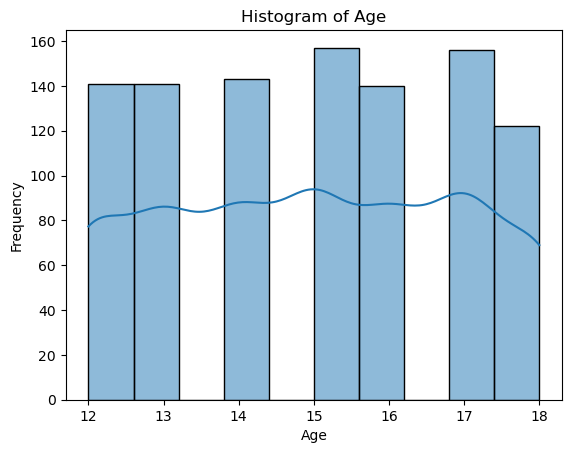

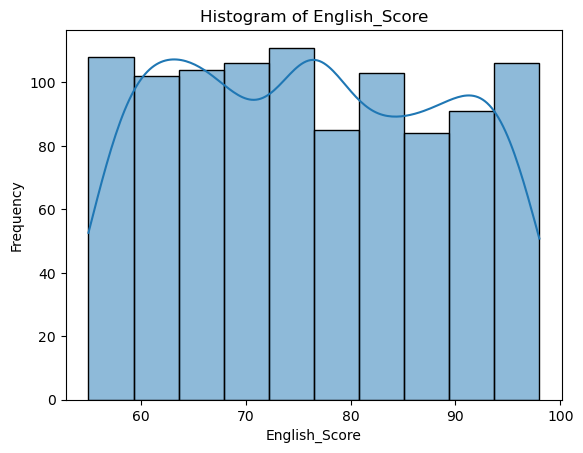

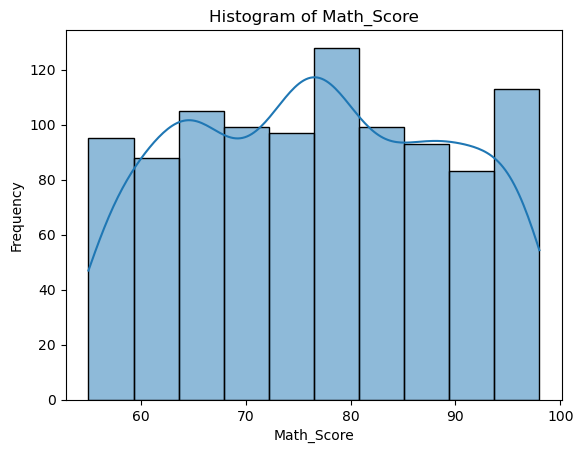

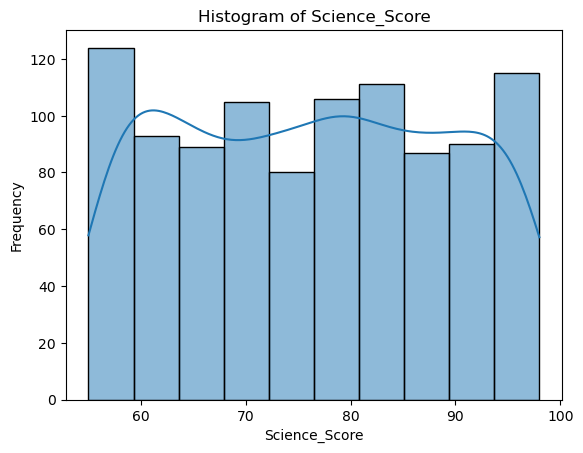

In [11]:
# Plotting Histograms
col = ['Age', 'English_Score', 'Math_Score', 'Science_Score']

for columns in col:
    sns.histplot(data=df[columns], bins=10, kde=True)
    plt.title('Histogram of ' + columns)
    plt.xlabel(columns)
    plt.ylabel('Frequency')
    plt.show()

Observations: Since we can see from the histograms that all columns data are not normally distributed (no Guassian Distribution) because there no distinct bell-shaped curve, therefore I will use Standard Scaler for this dataset because it is the most suitable out of the two scaler.

In [12]:
# Scaling of data using StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[col] = scaler.fit_transform(df_scaled[col])

df_scaled.head()

,Gender,Age,English_Score,Math_Score,Science_Score
0,2.0,1.546825,-0.961465,-1.676173,-1.272918
1,2.0,-1.516194,1.026742,-0.459251,1.604172
2,2.0,1.546825,-0.563823,-0.621507,0.282266
3,2.0,1.036321,-1.279578,-0.378123,1.604172
4,5.0,-1.005691,-0.404767,-0.053610,-0.028771


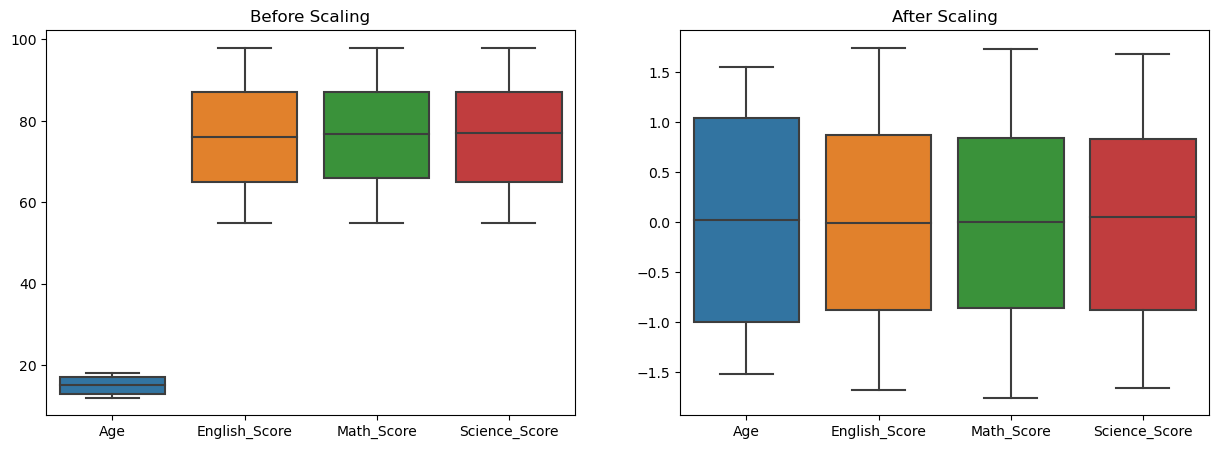

In [13]:
# Before & After Scaling - Boxplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df[col], ax=ax1)
ax1.set_title("Before Scaling")

sns.boxplot(data=df_scaled[col], ax=ax2)
ax2.set_title("After Scaling")

plt.show()

 From the two boxplots, we can see that the data is now in the same scale. Observe that there is no outliers too.

___
# Hopkins Clustering Tendency Test
___

This is a test to determine the clustering tendencies of my data.

High Hopkins Statitics:

- Value close to 1. Means that there is a high tendency of clustering. This means that the data is likely to have meaningful clusters.

Low Hopkins Statistics:

- Value close to 0. This means that there is a low tendency of clustering. This means that the data is not likely to perform well.

In [14]:

def hopkins(X):
   d = X.shape[1]
   #d = len(vars) # columns
   n = len(X) # rows
   m = int(0.1 * n) # heuristic from article [1]
   nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

   rand_X = sample(range(0, n, 1), m)

   ujd = []
   wjd = []
   for j in range(0, m):
      u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
      ujd.append(u_dist[0][1])
      w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
      wjd.append(w_dist[0][1])

   H = sum(ujd) / (sum(ujd) + sum(wjd))
   if isnan(H):
      print(ujd, wjd)
      H = 0

   return H

hopkins(df_scaled)

0.6599882991413909

From the Hopkins Statistics, we can see it is 0.60. This mean that the data is highly clusterable, and the data has a high chance to give meaningful clusters

___
# Start of Clustering

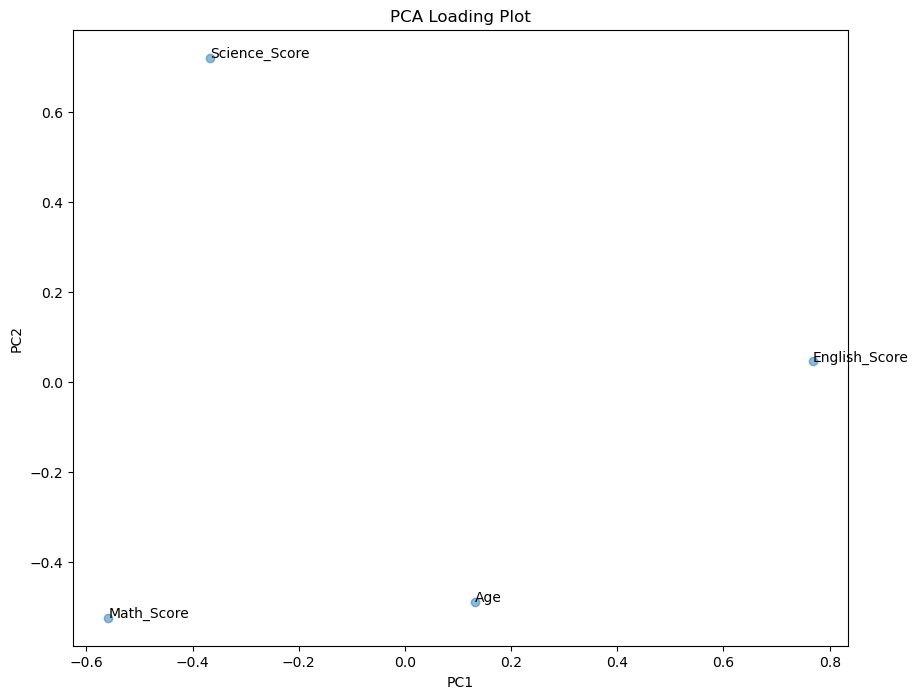

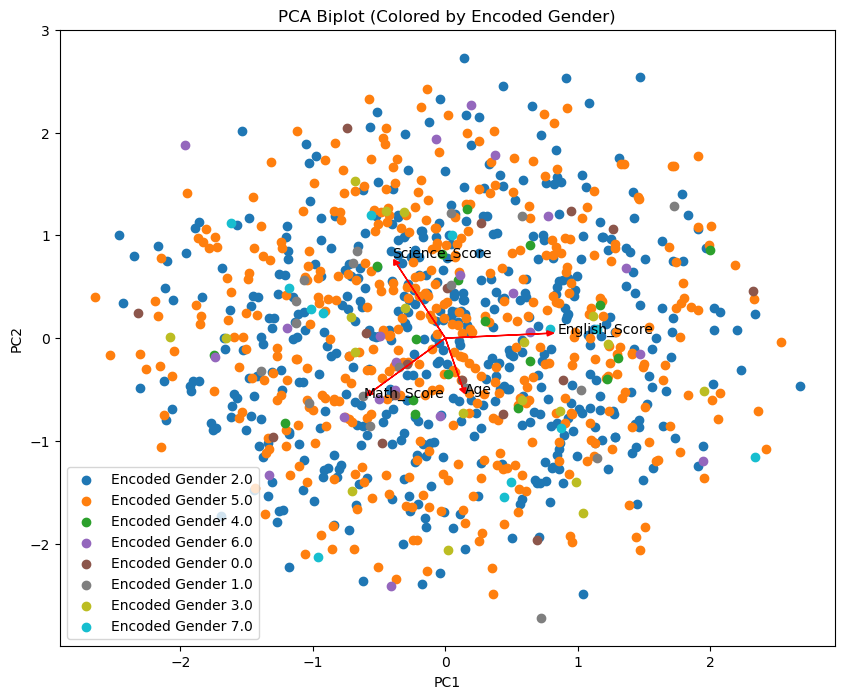

In [15]:
# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Gender']))  # Remove the 'Gender' column before scaling

# Step 2: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Step 3: Get loadings (correlation coefficients)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 4: Create a DataFrame of loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.drop(columns=['Gender']).columns)

# Step 5: Plot PCA loading plot
plt.figure(figsize=(10, 8))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'], alpha=0.5)
plt.title('PCA Loading Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Step 6: Add feature labels to the plot
for feature, (pc1, pc2) in loadings_df.iterrows():
    plt.text(pc1, pc2, feature)


unique_encoded_genders = df['Gender'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_encoded_genders)))  # Using colormap for colors

    
# Step 7: Combine loading plot and scatter plot
plt.figure(figsize=(10, 8))
for encoded_gender, color in zip(unique_encoded_genders, colors):
    gender_mask = df['Gender'] == encoded_gender
    plt.scatter(principal_components[gender_mask, 0], principal_components[gender_mask, 1], alpha=1, c=color, label=f'Encoded Gender {encoded_gender}')
plt.title('PCA Biplot (Colored by Encoded Gender)')
plt.xlabel('PC1')
plt.ylabel('PC2')
for feature, (pc1, pc2) in loadings_df.iterrows():
    plt.arrow(0, 0, pc1, pc2, head_width=0.05, head_length=0.05, color='r', alpha=1)
    plt.text(pc1 * 1.1, pc2 * 1.1, feature)
plt.legend()

plt.show()

Principal Component Analysis (PCA) is conducted on the dataset. Firstly, by standardizing the data to ensure uniform scaling across features. PCA is then applied to the standardized data, reducing it to two dimensions for visualization purposes. Loadings, which signify the correlation coefficients between the original features and the principal components, are computed and organized into a DataFrame. Then I proceeds to generate a loading plot, illustrating how each feature contributes to the principal components. Additionally, a biplot is created, combining the loading plot with a scatter plot of the data points projected onto the principal component space. Each data point is colored according to its encoded gender, allowing for further insights into potential gender-based patterns in the data.

___
# Getting the optimal k value for KMeans
___

k-value used: 2, Silhouette Score: 0.18497373388810343
k-value used: 3, Silhouette Score: 0.18277720949180098
k-value used: 4, Silhouette Score: 0.1978240514179742
k-value used: 5, Silhouette Score: 0.20714757685555638
k-value used: 6, Silhouette Score: 0.20821470559390565
k-value used: 7, Silhouette Score: 0.2139615383390484
k-value used: 8, Silhouette Score: 0.22457617853311268
k-value used: 9, Silhouette Score: 0.21570160052043846
k-value used: 10, Silhouette Score: 0.22260367643324952


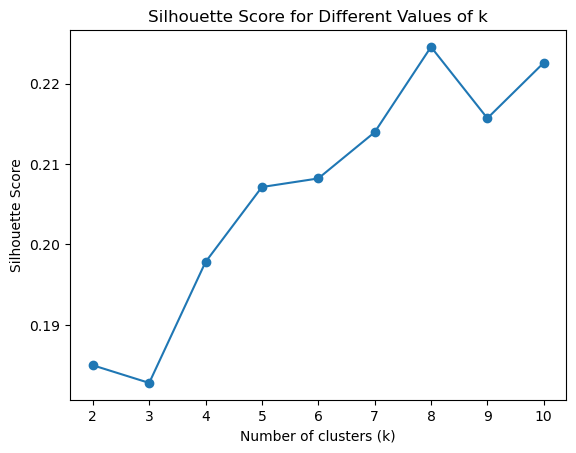

Optimal number of clusters (k): 8
Max silhouette score: 0.22457617853311268


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette score for different values of k
silhouette_scores = []
for i in range(2, 11):  # Considering a range of k from 2 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)  # df is your dataset
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    print(f"k-value used: {i}, Silhouette Score: {silhouette_score(df_scaled, labels)}")

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal value of k with the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because the range starts from 2
print("Optimal number of clusters (k):", optimal_k)
print("Max silhouette score:", max(silhouette_scores))

From the above cell, I specified the range of values for k to be used in the KMeans clustering. Then I used the for loop to loop through all the k values to be used in the KMeans model, and computed the silhouette score. Then I got the highest silhouette score and print it out, together with the plot of different values of k and their corresponding silhouette score when used in KMeans.

___
# Testing KMeans using optimal k value
___

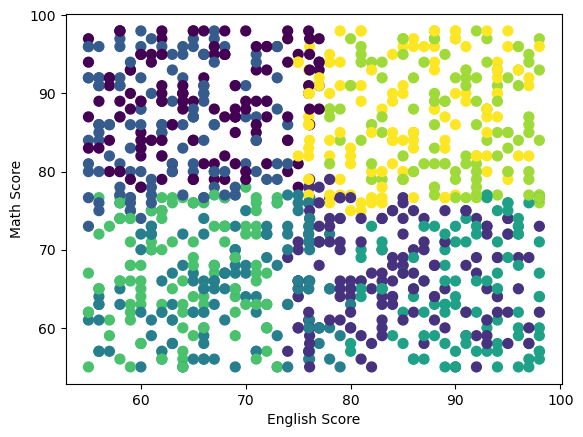

[2 0 4 4 2 6 4 1 0 5 3 3 1 3 5 0 1 4 2 2 1 3 4 6 7 0 3 3 1 4 0 5 1 4 5 6 0
 7 6 7 1 5 5 7 1 4 6 0 1 5 0 6 5 4 3 1 6 0 3 5 4 6 5 2 1 5 6 6 2 6 6 4 5 6
 0 2 6 7 1 0 7 0 7 5 2 0 4 1 6 1 5 0 4 6 0 4 6 1 0 4 2 2 4 2 7 6 0 7 0 7 5
 7 2 6 7 5 4 7 0 5 0 6 0 5 0 6 6 2 3 6 3 6 7 7 7 1 5 1 2 4 0 5 0 6 1 5 4 0
 6 4 4 2 4 1 4 3 7 2 7 5 3 5 1 4 7 4 4 6 1 7 7 1 7 4 3 3 4 2 1 7 7 7 4 1 4
 5 0 5 4 6 6 2 0 4 2 0 3 0 0 4 2 3 5 3 5 7 1 3 6 2 7 7 1 2 6 1 2 0 0 0 4 2
 1 6 2 6 5 6 2 7 3 1 7 6 7 6 3 1 4 4 4 1 1 1 7 4 1 6 4 3 1 6 3 1 1 7 2 0 5
 7 3 3 2 6 0 2 7 1 5 2 0 2 6 7 5 1 7 0 1 2 4 7 4 0 0 5 3 0 3 0 6 7 3 4 7 0
 2 3 4 5 4 1 1 2 0 1 5 4 1 1 1 6 1 3 3 3 7 4 3 5 3 1 2 1 6 5 3 1 2 3 0 5 1
 5 2 0 1 6 4 7 7 7 4 2 7 4 4 4 1 6 0 2 7 3 3 6 2 7 3 4 1 5 1 0 6 4 0 5 3 4
 3 5 5 3 6 0 4 4 4 0 4 5 6 2 3 2 6 1 0 2 3 3 2 3 3 1 4 1 7 2 7 3 3 1 1 3 2
 5 1 7 7 7 7 4 5 0 3 3 7 0 5 6 7 2 1 2 7 1 7 7 4 0 7 4 5 3 4 7 5 5 5 7 4 7
 4 6 5 7 2 7 0 7 1 2 0 7 5 4 0 4 2 3 1 1 1 7 1 7 1 3 4 1 5 4 5 1 6 7 0 5 3
 1 1 1 3 3 6 1 2 1 4 5 3 

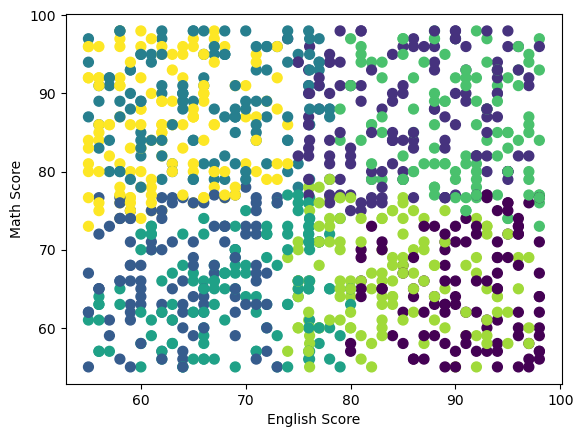

[5 6 0 0 5 2 0 7 6 1 3 3 7 3 1 6 7 0 5 5 7 3 0 2 4 6 3 3 7 0 6 1 7 0 1 2 6
 4 2 4 7 1 1 4 7 0 2 6 7 1 6 2 1 0 3 7 2 6 3 1 0 2 1 5 7 1 2 2 5 2 2 0 1 2
 6 5 2 4 7 6 4 6 4 1 5 6 0 7 2 7 1 6 0 2 6 0 2 7 6 0 5 5 0 5 4 2 6 4 6 4 1
 4 5 2 4 1 0 4 6 1 6 2 6 1 6 2 2 5 3 2 3 2 4 4 4 7 1 7 5 0 6 1 6 2 7 1 0 6
 2 0 0 5 0 7 0 3 4 5 4 1 3 2 7 0 4 0 0 2 7 4 4 7 4 0 3 3 0 5 7 4 4 4 0 7 0
 1 6 1 0 2 2 5 6 0 5 6 3 6 6 0 5 3 1 3 1 4 7 3 2 5 4 4 7 5 2 7 5 6 6 6 0 5
 7 2 5 2 1 2 5 4 3 7 4 2 4 2 3 7 0 0 0 7 7 7 4 0 7 2 0 3 7 2 3 7 7 4 5 6 2
 4 3 3 5 2 6 5 4 7 1 5 6 5 2 4 1 7 4 2 7 5 0 4 0 6 6 2 3 6 3 6 2 4 3 0 4 6
 5 3 0 1 0 7 7 5 6 7 1 0 7 7 7 2 7 3 3 3 4 0 3 2 3 7 5 7 2 1 3 7 5 3 6 1 7
 1 5 6 7 2 0 4 4 4 0 5 4 0 0 0 7 2 6 5 4 3 3 2 5 4 3 0 7 1 7 6 2 0 6 1 3 0
 3 1 1 3 2 6 0 0 0 6 0 1 2 5 3 5 2 7 6 5 3 3 5 3 3 7 0 7 4 5 4 3 3 7 7 3 5
 1 7 4 4 4 4 0 1 6 3 3 4 6 1 2 4 5 7 5 4 7 4 4 0 6 4 0 1 3 0 4 2 1 1 4 0 4
 0 2 1 4 5 4 6 4 7 5 6 4 1 0 6 0 5 3 7 7 7 4 7 4 7 3 0 7 1 0 1 7 2 4 6 1 3
 7 7 7 3 3 2 7 5 7 0 1 3 

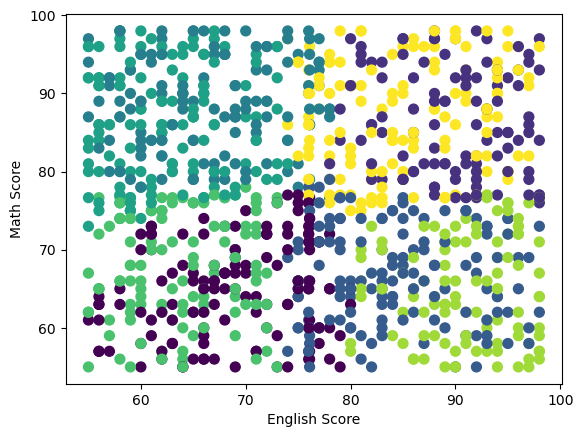

[3 6 1 1 3 4 1 5 6 2 0 0 5 0 2 6 5 1 3 3 5 0 1 4 7 6 0 0 5 1 6 2 5 1 2 4 6
 7 4 7 5 2 2 7 5 1 4 6 5 2 6 4 2 1 0 5 4 6 0 2 1 4 2 3 5 2 4 4 3 4 4 1 2 4
 6 3 4 7 5 6 7 6 7 2 3 6 1 5 4 5 2 6 1 4 6 1 4 5 6 1 3 3 1 3 7 4 6 7 6 7 2
 7 3 4 7 2 1 7 6 2 6 4 6 2 6 4 4 3 0 4 0 4 7 7 7 5 2 5 3 1 6 2 6 4 5 2 1 6
 4 1 1 3 1 5 1 0 7 3 7 2 0 4 5 1 7 1 1 4 5 7 7 5 7 1 0 0 1 3 5 7 7 7 1 5 1
 2 6 2 1 4 4 3 6 1 3 6 0 6 6 1 3 0 2 0 2 7 5 0 4 3 7 7 5 3 4 5 3 6 6 6 1 3
 5 4 3 4 2 4 3 7 0 5 7 4 7 4 0 5 1 1 1 5 5 5 7 1 5 4 1 0 5 4 0 5 5 7 3 6 4
 7 0 0 3 4 6 3 7 5 2 3 6 3 4 7 2 5 7 4 5 3 1 7 1 6 6 4 0 6 0 6 4 7 0 1 7 6
 3 0 1 2 1 5 5 3 6 5 2 1 5 5 5 4 5 0 0 0 7 1 0 4 0 5 3 5 4 2 0 5 3 0 6 2 5
 2 3 6 5 4 1 7 7 7 1 3 7 1 1 1 5 4 6 3 7 0 0 4 3 7 0 1 5 2 5 6 4 1 6 2 0 1
 0 2 2 0 4 6 1 1 1 6 1 2 4 3 0 3 4 5 6 3 0 0 3 0 0 5 1 5 7 3 7 0 0 5 5 0 3
 2 5 7 7 7 7 1 2 6 0 0 7 6 2 4 7 3 5 3 7 5 7 7 1 6 7 1 2 0 1 7 4 2 2 7 1 7
 1 4 2 7 3 7 6 7 5 3 6 7 2 1 6 1 3 0 5 5 5 7 5 7 5 0 1 5 2 1 2 5 4 7 6 2 0
 5 5 5 0 0 4 5 3 5 1 2 0 

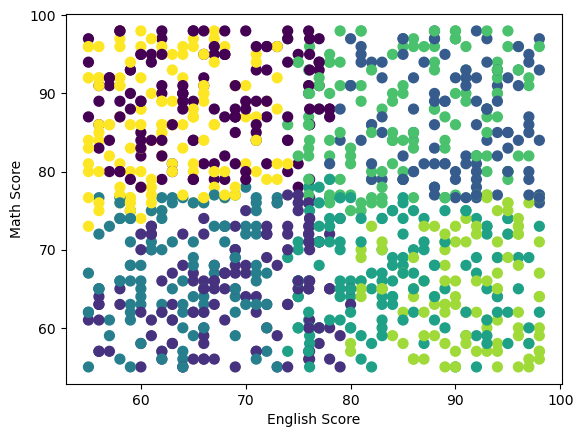

[7 4 0 0 7 5 0 3 4 1 2 2 3 2 1 4 3 0 7 7 3 2 0 5 6 4 2 2 3 0 4 1 3 0 1 5 4
 6 5 6 3 1 1 6 3 0 5 4 3 1 4 5 1 0 2 3 5 4 2 1 0 5 1 7 3 1 5 5 7 5 5 0 1 5
 4 7 5 6 3 4 6 4 6 1 0 4 0 3 5 3 1 4 0 5 4 0 5 3 4 0 7 7 0 0 6 5 4 6 4 6 1
 6 7 5 6 1 0 6 4 1 4 5 4 1 4 5 5 7 2 5 2 5 6 6 6 3 1 3 7 0 4 1 4 5 3 1 0 4
 5 0 0 7 0 3 0 2 6 7 6 1 2 1 3 0 6 0 0 5 3 6 6 3 6 0 2 2 0 7 3 6 6 6 0 3 0
 1 4 1 0 5 5 7 4 0 7 4 2 4 4 0 7 2 1 2 1 6 3 2 5 7 6 6 3 7 5 3 7 4 4 4 0 7
 3 5 7 5 1 5 7 6 2 3 6 5 6 5 2 3 0 0 0 3 3 3 6 0 3 5 0 2 3 5 2 3 3 6 7 4 1
 6 2 2 7 5 4 7 6 3 1 7 4 7 5 6 1 3 6 4 3 7 0 6 0 4 4 1 2 4 2 4 5 6 2 0 6 4
 7 2 0 1 0 3 3 7 4 3 1 0 3 3 3 5 3 2 2 2 6 0 2 1 2 3 7 3 5 1 2 3 7 2 4 1 3
 1 7 4 3 5 0 6 6 6 0 7 6 0 0 0 3 5 4 7 6 2 2 5 7 6 2 0 3 1 3 4 5 0 4 1 2 0
 2 1 1 2 5 4 0 0 0 4 0 1 5 7 2 7 5 3 4 7 2 2 7 2 2 3 0 3 6 7 6 2 2 3 3 2 7
 1 3 6 6 6 6 0 1 4 2 2 6 4 1 5 6 7 3 7 6 3 6 6 0 4 6 0 1 2 0 6 1 1 1 6 0 6
 0 5 1 6 7 6 4 6 3 7 4 6 1 0 4 0 7 2 3 3 3 6 3 6 3 2 0 3 1 0 1 3 5 6 4 1 2
 3 3 3 2 2 5 3 7 3 0 1 2 

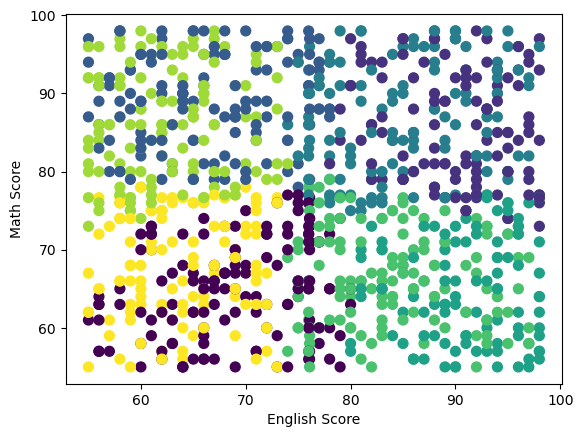

[3 7 2 2 3 1 2 5 7 4 0 0 5 0 4 7 5 2 3 3 5 0 2 1 6 7 0 0 5 2 7 4 5 2 4 1 7
 6 1 6 5 4 4 6 5 2 1 7 5 4 7 1 4 2 0 5 1 7 0 4 2 1 4 3 5 4 1 1 3 1 1 2 4 1
 7 3 1 6 5 7 6 7 6 4 3 7 2 5 1 5 4 7 2 1 7 2 1 5 7 2 3 3 2 3 6 1 7 6 7 6 4
 6 3 1 6 4 2 6 7 4 7 1 7 4 7 1 1 3 0 1 0 1 6 6 6 5 4 5 3 2 7 4 7 1 5 4 2 7
 1 2 2 3 2 5 2 0 6 3 6 4 0 1 5 2 6 2 2 1 5 6 6 5 6 2 0 0 2 3 5 6 6 6 2 5 2
 4 7 4 2 1 1 3 7 2 3 7 0 7 7 2 3 0 4 0 4 6 5 0 1 3 6 6 5 3 1 5 3 7 7 7 2 3
 5 1 3 1 4 1 3 6 0 5 6 1 6 1 0 5 3 2 2 5 5 5 6 2 5 1 2 0 5 1 0 5 5 6 3 7 1
 6 0 0 3 1 7 3 6 5 4 3 7 3 1 6 4 5 6 1 5 3 2 6 2 7 7 1 0 7 0 7 1 6 0 2 6 7
 3 0 2 4 2 5 5 3 7 5 4 2 5 5 5 1 5 0 0 0 6 2 0 1 0 5 3 5 1 4 0 5 3 0 7 4 5
 4 3 7 5 1 2 6 6 6 2 3 6 2 2 2 5 1 7 3 6 0 0 1 0 6 0 2 5 4 5 7 1 2 7 4 0 2
 0 4 4 0 1 7 2 2 2 7 2 4 1 3 0 3 1 5 7 3 0 0 3 0 0 5 2 5 6 3 6 0 0 5 5 0 3
 4 5 6 6 6 6 2 4 7 0 0 6 7 4 1 6 3 5 3 6 5 6 6 2 7 6 2 4 0 2 6 1 4 4 6 2 6
 2 1 4 6 3 6 7 6 5 3 7 6 4 2 7 2 3 0 5 5 5 6 5 6 5 0 2 5 4 2 4 5 1 6 7 4 0
 5 5 5 0 0 1 5 3 5 2 4 0 

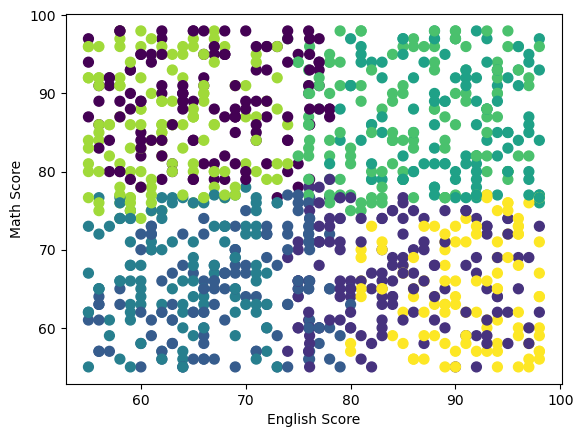

[3 2 5 5 3 0 5 1 2 4 6 6 1 6 4 2 1 5 3 3 1 6 5 0 7 2 6 6 2 5 2 4 1 5 4 0 2
 7 0 7 1 4 4 7 1 5 0 2 1 4 2 0 4 5 6 1 0 2 6 4 5 0 4 3 1 4 0 0 3 0 0 5 4 0
 2 3 0 7 1 2 7 2 7 4 3 2 5 1 0 1 4 2 5 0 2 5 0 1 2 5 3 3 5 3 7 0 2 7 2 7 4
 7 3 0 7 4 5 7 2 4 2 0 2 4 2 0 0 3 6 0 6 0 7 7 7 1 4 1 3 5 2 4 2 0 1 4 5 2
 0 5 5 3 5 2 5 6 7 3 7 4 6 0 1 5 7 5 5 0 1 7 7 1 7 5 6 6 5 3 1 7 7 7 5 1 5
 4 2 4 5 0 0 3 2 5 3 2 6 2 2 5 3 6 4 6 4 7 1 6 0 3 7 7 1 3 0 1 3 2 2 2 5 3
 1 0 3 0 4 0 3 7 6 2 7 0 7 0 6 1 5 5 5 1 1 1 7 5 1 0 5 6 1 0 6 1 1 7 3 2 0
 7 6 6 3 0 2 3 7 1 4 3 2 3 0 7 4 1 7 0 1 3 5 7 5 2 2 0 6 2 6 2 0 7 6 5 7 2
 3 6 5 4 5 1 1 3 2 1 4 5 1 1 1 0 1 6 6 6 7 5 6 0 6 1 3 1 0 4 6 1 3 6 2 4 1
 4 3 2 1 0 5 7 7 7 5 3 7 5 5 5 1 0 2 3 7 6 6 0 3 7 6 5 1 4 1 2 0 5 2 4 6 5
 6 4 4 6 0 2 5 5 5 2 5 4 0 3 6 3 0 1 2 3 6 6 3 6 6 1 5 1 7 3 7 6 6 1 1 6 3
 4 1 7 7 7 7 5 4 2 6 6 7 2 4 0 7 3 1 3 7 5 7 7 5 2 7 5 4 6 5 7 0 4 4 7 5 7
 5 0 4 7 3 7 2 7 1 3 2 7 4 5 2 5 3 6 1 1 1 7 1 7 1 6 5 1 4 5 4 1 0 7 2 4 6
 1 1 1 6 6 0 1 3 1 5 4 6 

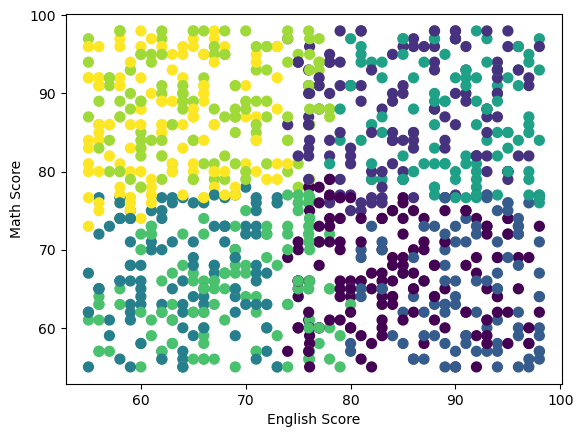

In [17]:
# Fit a KMeans model to the data 
kmeans = KMeans(n_clusters=optimal_k, n_init=10)  # Add a value for n_init
kmeans.fit(df)

# Visualize the results 
y_kmeans = kmeans.predict(df)

# Scatter plot
plt.scatter(df['English_Score'], df['Math_Score'], c=y_kmeans, s=50, cmap='viridis') 

# Plot centroids for each cluster 
centers = kmeans.cluster_centers_ 
plt.xlabel('English Score') 
plt.ylabel('Math Score') 
plt.show()

# Multiple Fits (Optional)
for x in range(6):
    kmeans.fit(df)

    # Visualize the results
    y_kmeans = kmeans.predict(df)
    print(y_kmeans)
    print()

   # Scatter plot
    plt.scatter(df['English_Score'], df['Math_Score'], c=y_kmeans, s=50, cmap='viridis') 

    # plot centroids for each cluster
    centers = kmeans.cluster_centers_
   
    plt.xlabel('English Score')
    plt.ylabel('Math Score')
    plt.show()

The code in the cell above utilizes the KMeans algorithm with a specified number of clusters (`optimal_k`) and multiple initializations (`n_init=10`) to cluster a dataset of scaled English and Math scores. After fitting the model, it predicts cluster labels for each data point and visualizes the clusters using a scatter plot, with data points colored according to their clusters. Finally, the plot displays English scores on the x-axis, Math scores on the y-axis, and includes appropriate labels.

Observations: From the scatter plot, we can see that there is some clusters but the data points are scattered everywhere and overlap each other. This is most likely because our scaled dataset has more than 2 features, which make visualising of this dataset in a 2-dimensional point of view impossible. Thus, we need to use PCA or TSNE to visualise them.

___
# Variance
___

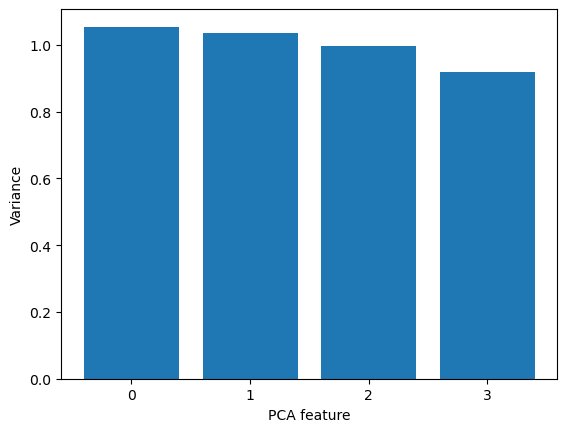

In [18]:
pca = PCA()
pca.fit(df_scaled)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('Variance')
plt.xlabel('PCA feature')
plt.show()

The above code performs PCA on a standardized dataset (`df_scaled`) and plots the explained variance for each principal component. The bar plot visualizes the contribution of each component to the overall variance, aiding in determining the optimal number of components to retain for dimensionality reduction.

___
# PCA
___

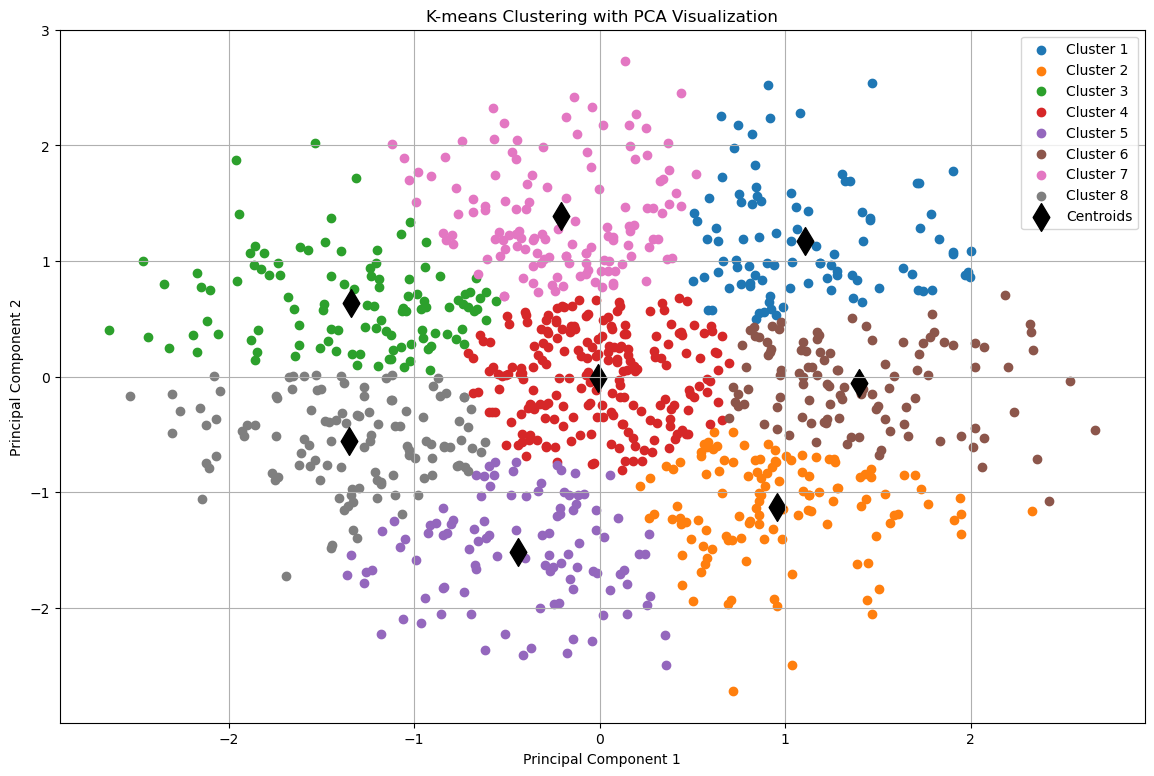

In [19]:
# df_scaled is the preprocessed and scaled dataset
# optimal_k is the optimal number of clusters determined earlier in the preious few cell

# Use PCA to reduce dimensionality (From 12 to 2)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_scaled)

# Perform K-means clustering on the reduced-dimensional data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_PCA)
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(14, 9))
for cluster_label in range(optimal_k):
    plt.scatter(df_PCA[cluster_labels == cluster_label, 0], 
                df_PCA[cluster_labels == cluster_label, 1], 
                label=f'Cluster {cluster_label + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='d', s=200, color='black', label='Centroids')
plt.title('K-means Clustering with PCA Visualization', )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

From the above cell, it applies PCA to reduce the dataset's dimensionality from 12 features to 2 principal components and then performs K-means clustering with a previously determined optimal number of clusters (`optimal_k`). The resulting clusters are visualized in a scatter plot, with each cluster represented by a different color and centroids marked with diamonds. This visualization provides insight into the distribution and grouping of data points in the reduced-dimensional space, facilitating the identification of underlying patterns or structures within the data.

Observation: The scatter plot clearly reveals distinct clusters, each depicted by a unique color, with minimal overlap observed between clusters.

___
# Create Correlation Coefficients Dataframe
___

In [20]:
# Perform PCA on Scaled Data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)

# Principal components correlation coefficients
loadings = pca.components_

# Number of features before PCA
n_features = pca.n_features_in_

# Feature names before PCA
feature_names = ['Age', 'English_Score', 'Math_Score', 'Science_Score']

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
Age,0.128583,-0.480931
English_Score,0.748239,0.045339
Math_Score,-0.544186,-0.515590
Science_Score,-0.357026,0.707684


This code conducts PCA on scaled data, reducing the dimensionality to 2 principal components. It then retrieves the correlation coefficients between the original features and these principal components. Before PCA, the dataset had four features: Age, English_Score, Math_Score, and Science_Score. These features are mapped to their respective principal components, and the correlation coefficients are organized into a DataFrame for analysis.

___
# Create a 2D loading plot
___

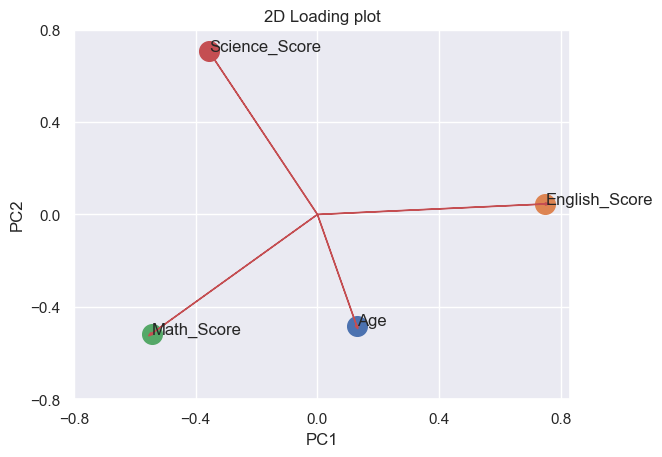

In [21]:
sns.set()

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
    
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show plot
plt.title('2D Loading plot')
plt.show()

Code in the above cell creates a scatterplot to visualize the loadings of the x and y axes. Each feature's loading is represented as a point on the plot, with an arrow indicating its direction and magnitude. The feature names are labeled next to their respective points. The x-axis corresponds to the first principal component (PC1), while the y-axis corresponds to the second principal component (PC2).

___
# Scale the PCA data again
___

In [22]:
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

# Map Targets to names
target_names = {
    0:'Bigender',
    1:'Genderfluid', 
    2:'Female',
    3:'Agender',
    4:'Genderqueer',
    5:'Male',
    6:'Non-binary',
    7:'Polygender',
}

pca_df['target'] = df['Gender']
pca_df['target'] = pca_df['target'].map(target_names)

# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

pca_df_scaled

,PC1,PC2,target
0,0.159109,-0.151246,Female
1,0.047102,0.394171,Female
2,0.002719,-0.045750,Female
3,-0.223993,0.142010,Female
4,-0.073853,0.086734,Male
...,...,...,...
995,0.029285,0.208352,Female
996,0.119788,-0.040792,Genderqueer
997,0.055200,-0.099745,Male
998,0.183761,0.011068,Male


In this code, after performing PCA, the principal component scores are organized into a DataFrame called `pca_df`. They are scaled again to align their magnitudes with the original data, ensuring consistency for accurate analysis and interpretation.

___
# Visualisation - Biplot of PCA
___

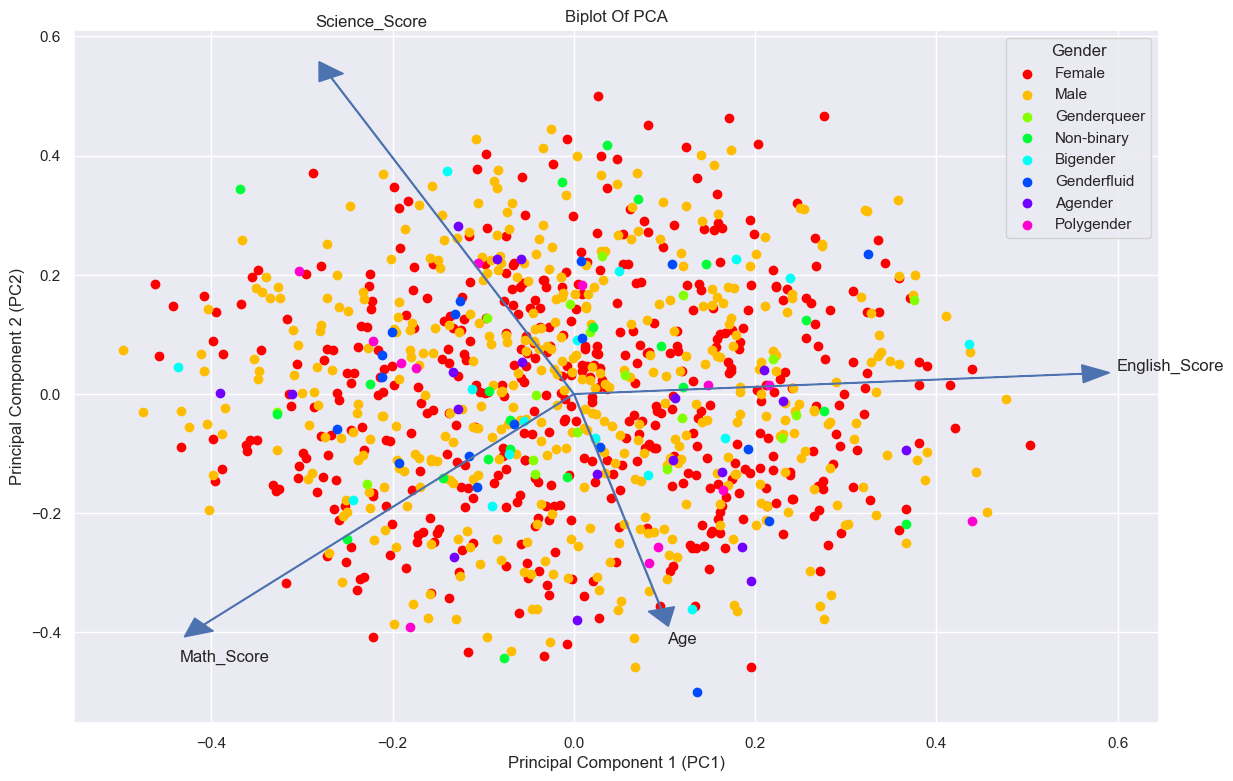

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set()

# Create a figure
plt.figure(figsize=(14, 9))

# Define a dictionary to map category names to numerical values
category_mapping = {category: i for i, category in enumerate(pca_df_scaled['target'].unique())}

# Plot the points
for target_category in pca_df_scaled['target'].unique():
    subset = pca_df_scaled[pca_df_scaled['target'] == target_category]
    category_value = category_mapping[target_category]
    plt.scatter(subset['PC1'], subset['PC2'], c=plt.cm.hsv(category_value / len(pca_df_scaled['target'].unique())), label=target_category, alpha=1)

# Plot the loadings as arrows
scaling_factor = 0.75  # Decrease this value slightly to make the arrows shorter
for i, varnames in enumerate(feature_names):
    plt.arrow(0, 0, loadings[0, i] * scaling_factor, loadings[1, i] * scaling_factor, head_width=0.03, head_length=0.03, color='b')
    plt.text(xs[i] * 0.80, ys[i] * 0.87, varnames)

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Biplot Of PCA')

# Create legend labels
legend_labels = [category for category in pca_df_scaled['target'].unique()]

# Add legend
plt.legend(loc='upper right', labels=legend_labels, title='Gender')

# Show plot
plt.grid(True)
plt.show()


Above cell: The code creates a biplot of PCA results, combining scatterplot points for each category and arrows representing feature loadings. It sets the Seaborn style, defines category mappings for coloring, and plots points colored by gender categories. Arrows indicate feature loadings on the PCA plot, with labels for feature names. Axes labels, a title, and a legend are added for clarity.

Observations: In PCA, positive loadings indicate that higher values of the original feature correspond to higher values of the principal component, while negative loadings indicate the opposite. In this case, age and English scores have positive loadings on PC1, implying that higher ages and better English scores contribute positively to PC1 values. Science scores have a positive loading on PC2, indicating that higher science scores lead to higher PC2 values. Conversely, math scores have a negative loading on PC2, suggesting that higher math scores correspond to lower PC2 values. These loadings offer insights into how each feature influences the variation captured by the principal components.

___
# Hierarchical Clustering
___

In [24]:
# Import Student Performance Dataset
df_hierarchical = pd.read_csv('./CA2-Dataset/Student_Performance_dataset.csv', sep=',')
df_hierarchical.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


Import dataset as `df_hierarchical`

In [25]:
df_hierarchical = pd.get_dummies(df_hierarchical)

# Convert boolean values to integers (0s and 1s)
gender_columns = ['Gender_Agender', 'Gender_Bigender', 'Gender_Female', 'Gender_Genderfluid', 'Gender_Genderqueer', 'Gender_Male', 'Gender_Non-binary', 'Gender_Polygender']
df_hierarchical[gender_columns] = df_hierarchical[gender_columns].astype(int)

# Droping Student_ID column
df_hierarchical = df_hierarchical.drop(['Student_ID'], axis=1)
df_hierarchical.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,18,64.0,56.0,60,0,0,1,0,0,0,0,0
1,12,89.0,71.0,97,0,0,1,0,0,0,0,0
2,18,69.0,69.0,80,0,0,1,0,0,0,0,0
3,17,60.0,72.0,97,0,0,1,0,0,0,0,0
4,13,71.0,76.0,76,0,0,0,0,0,1,0,0


Code in the above cell transforms a DataFrame `df_hierarchical` by converting categorical variables into dummy variables using one-hot encoding through `pd.get_dummies()`. It then converts boolean values to integers (0s and 1s) in specific gender-related columns. The 'Student_ID' column is dropped from the DataFrame. The resulting DataFrame is a modified version suitable for analysis, with categorical variables transformed into a format usable for machine learning algorithms.

In [26]:
# Impute the data
# =========================================================================================================================
# Instantiate the impute model
imp = SimpleImputer(strategy='mean')

# Fitting the model into the data to transform the data
df_imputed = imp.fit_transform(df_hierarchical)

# Convert the imputed array back into a dataframe
df_hierarchical = pd.DataFrame(df_imputed, columns=df_hierarchical.columns)

# Display Imputed Data and check if there are any missing values
display(df_hierarchical.head())
df_hierarchical.isna().sum()

,Age,English_Score,Math_Score,Science_Score,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
0,18.0,64.0,56.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,12.0,89.0,71.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.0,69.0,69.0,80.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,17.0,60.0,72.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13.0,71.0,76.0,76.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Age                   0
English_Score         0
Math_Score            0
Science_Score         0
Gender_Agender        0
Gender_Bigender       0
Gender_Female         0
Gender_Genderfluid    0
Gender_Genderqueer    0
Gender_Male           0
Gender_Non-binary     0
Gender_Polygender     0
dtype: int64

The code in the cell above imputes missing values in the DataFrame `df_hierarchical` using the mean strategy. It first instantiates a SimpleImputer model with the mean strategy. Then, it fits the model to the data to transform it, replacing missing values with the mean of each column. The transformed data is converted back into a DataFrame. Finally, the imputed DataFrame is displayed, and a check is performed to ensure that there are no missing values remaining.

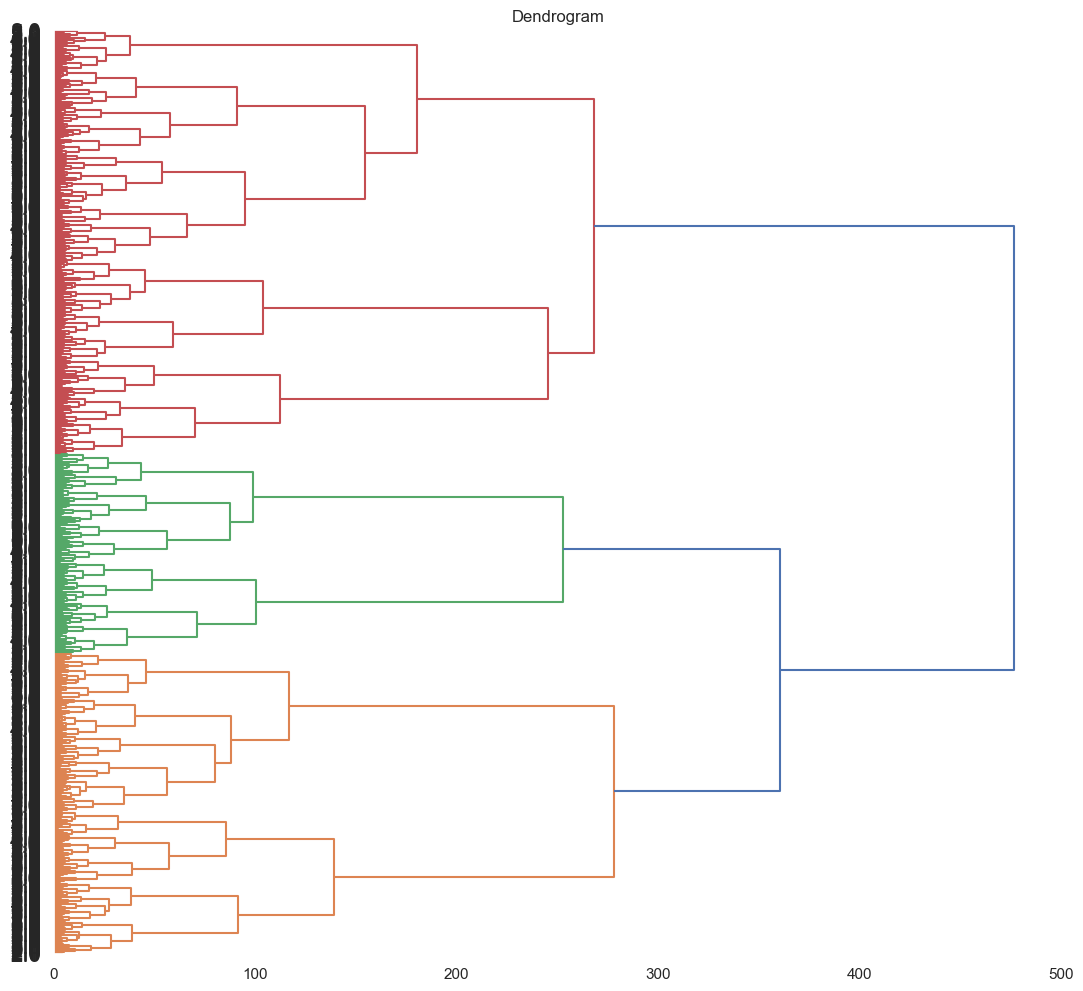

In [27]:
X2 = df_hierarchical.iloc[:,1:]
Z2 = linkage(X2, method='ward', metric='euclidean')

labelList = list(df['Gender'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.title("Dendrogram")
plt.show()

Code from the cell above conducts hierarchical clustering on the DataFrame `df_hierarchical` using Ward's method with Euclidean distance as the metric. It selects all columns except the first one as the input data (`X2`). The linkage matrix `Z2` is computed using the hierarchical clustering algorithm. Then, a dendrogram is plotted, with gender labels displayed on the right side. The dendrogram visualizes the clustering hierarchy, showcasing the grouping of data points based on their similarity. The height of each cluster fusion in the dendrogram represents the distance between clusters.

Observations: We can see that there is multiple hierarchy in the dendrogram, hence identify the optimal number of clusters by looking for significant increases in distance between fusion stages. When the distance between two fusion stages becomes notably large, a horizontal line is drawn to cut the dendrogram. The number of links broken by this line corresponds to the number of clusters to be used in the analysis. This approach helps determine the appropriate level of granularity for clustering, ensuring that the resulting clusters capture meaningful patterns in the data without overly fragmenting it.

In [28]:
from scipy.cluster.hierarchy import fcluster

df_hierarchical['Clusters'] = fcluster(Z2, 9, criterion='maxclust')

df_hierarchical.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Agender,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender,Clusters
0,18.0,64.0,56.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,89.0,71.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
2,18.0,69.0,69.0,80.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
3,17.0,60.0,72.0,97.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
4,13.0,71.0,76.0,76.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


This code assigns cluster labels to the data points in `df_hierarchical` using hierarchical clustering with nine clusters. It utilizes the `fcluster` function from SciPy's hierarchical clustering module, based on the specified criteria (`maxclust`). The assigned cluster labels are added as a new column named 'Clusters' to the DataFrame, and the first few rows with the cluster assignments are displayed.

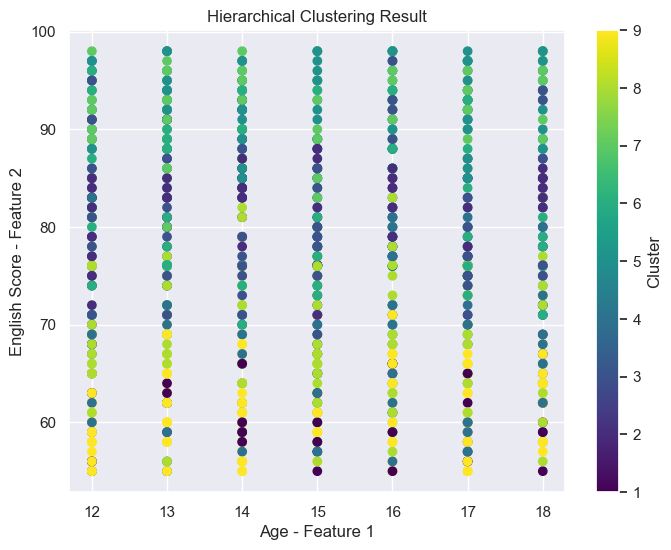

In [29]:
# Assuming your DataFrame is named df_hierarchical
plt.figure(figsize=(8, 6))
plt.scatter (df_hierarchical['Age'], df_hierarchical['English_Score'], c=df_hierarchical['Clusters'], cmap='viridis')
plt.title('Hierarchical Clustering Result')
plt.xlabel('Age - Feature 1')
plt.ylabel('English Score - Feature 2')
plt.colorbar(label='Cluster')
plt.show()

The code in the cell above creates a scatter plot to visualize the result of hierarchical clustering on the DataFrame `df_hierarchical`. Each point represents a data instance, positioned according to its 'Age' and 'English_Score'. Colors indicate the assigned cluster labels, allowing for a clear view of the clustering pattern based on these two features.

Observation: We can see that the data points in the scatter point is in straight line and thus we cannot interpret the scatter plot. This indicate that our data must have a lot of dimensions, which is true (because of the number of features our data has). Hence we will either use PCA and TSNE to do dimensiion reduce on the dataframe.

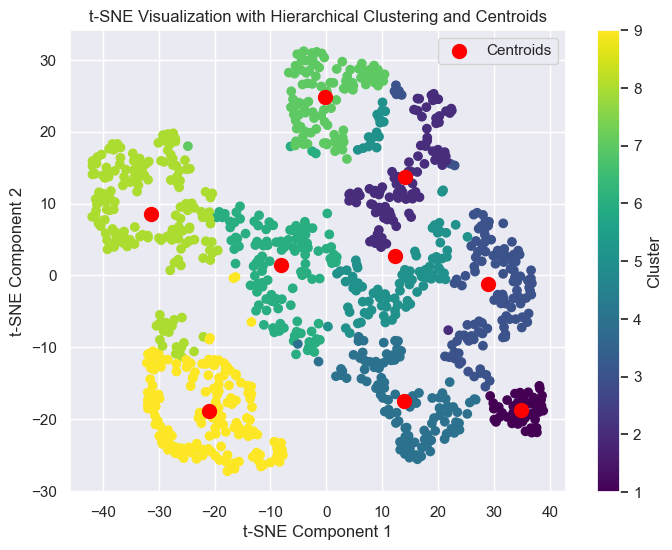

In [30]:
# Assuming X contains your high-dimensional data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_hierarchical)

# Calculate centroids for each cluster
centroids = []
for cluster_label in np.unique(df_hierarchical['Clusters']):
    centroid = X_tsne[df_hierarchical['Clusters'] == cluster_label].mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# Plot the t-SNE visualization with cluster colors and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_hierarchical['Clusters'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=100, c='red', label='Centroids')
plt.title('t-SNE Visualization with Hierarchical Clustering and Centroids')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

To visualise our data in a 2-dimensional space, I used T-SNE because the visualization of high-dimensional data with clustering results, t-SNE is often preferred because it tends to preserve the local structure of the data better, making it easier to identify clusters or groups. But, t-SNE has some limitations: sensitivity to hyperparameters and potential distortions in the data.

Observations: Hard to interpret the clusters need to analyse more

Cluster 1 Characteristics:
             Age  English_Score  Math_Score  Science_Score  Gender_Agender  \
count  44.000000      44.000000   44.000000      44.000000       44.000000   
mean   15.113636      60.363636   64.295455      64.295455        0.022727   
std     1.931573       3.355599    4.887476       4.305646        0.150756   
min    12.000000      55.000000   55.000000      55.000000        0.000000   
25%    14.000000      58.000000   61.750000      61.750000        0.000000   
50%    15.000000      60.000000   65.000000      65.000000        0.000000   
75%    17.000000      63.000000   68.000000      67.000000        0.000000   
max    18.000000      66.000000   74.000000      72.000000        1.000000   

       Gender_Bigender  Gender_Female  Gender_Genderfluid  Gender_Genderqueer  \
count             44.0      44.000000                44.0           44.000000   
mean               0.0       0.500000                 0.0            0.068182   
std                0.0     

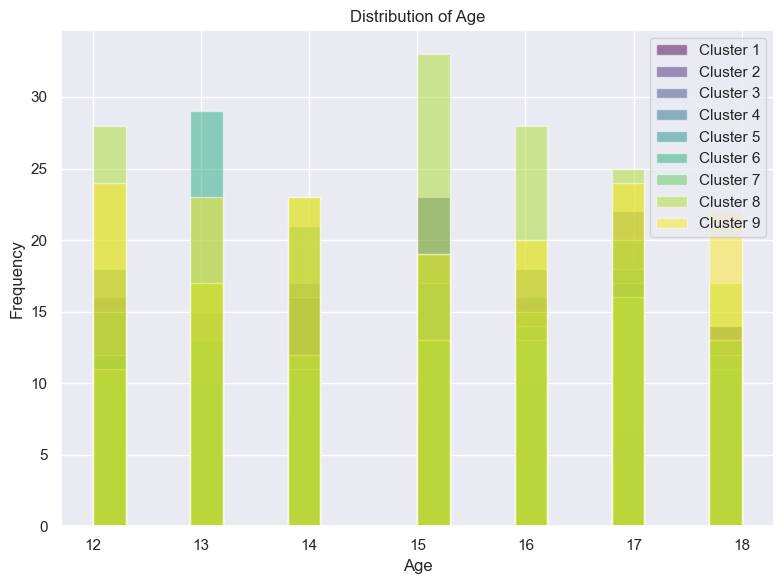

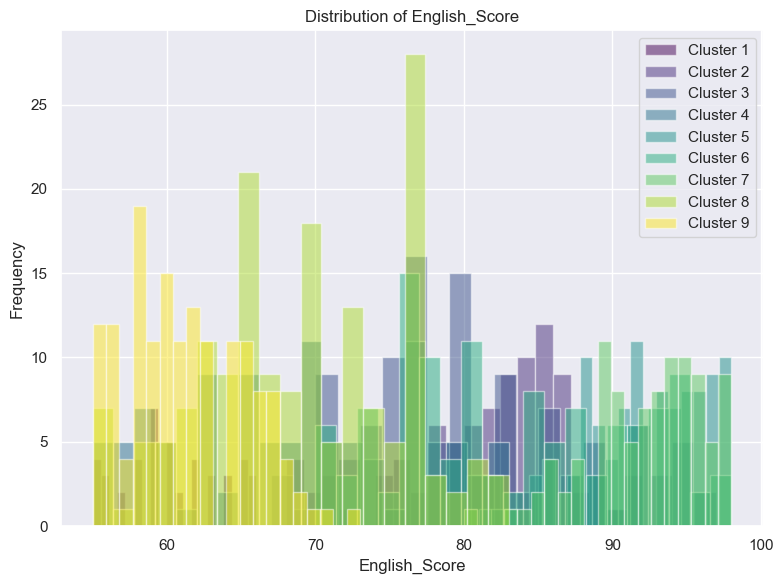

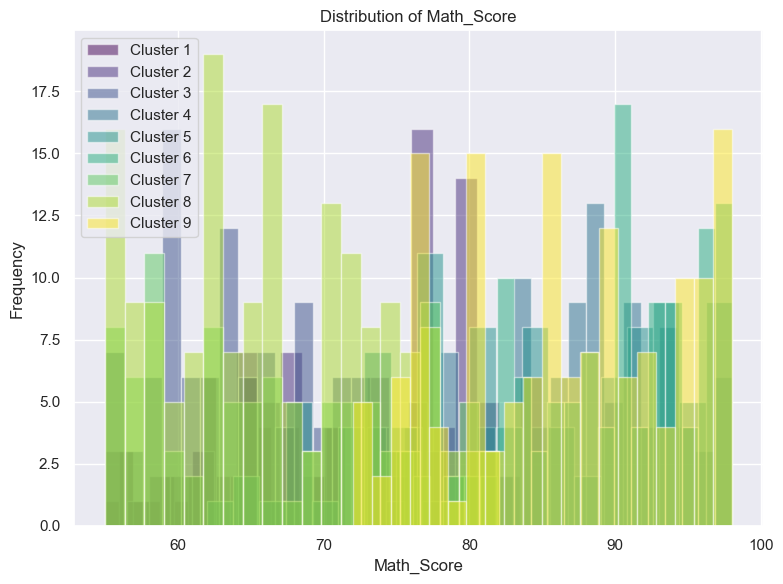

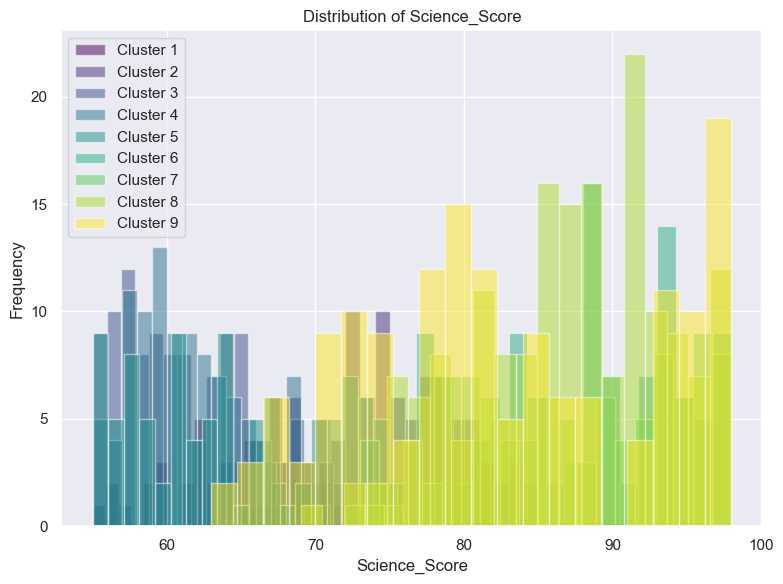

In [31]:
import matplotlib.cm as cm

# Assuming X contains your high-dimensional data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_hierarchical)

# Assuming df_hierarchical contains your original dataset with cluster labels
# Retrieve cluster labels
cluster_labels = df_hierarchical['Clusters'].values

# Initialize an empty dictionary to store cluster data
cluster_data = {}

# Extract data points for each cluster
for cluster_label in np.unique(cluster_labels):
    cluster_data[cluster_label] = df_hierarchical[df_hierarchical['Clusters'] == cluster_label]

# Analyze cluster characteristics
for cluster_label, data_points in cluster_data.items():
    print(f"Cluster {cluster_label} Characteristics:")
    print(data_points.describe())

# Get the names of the features
feature_names = df_hierarchical.columns[:-1]  # Exclude the 'Clusters' column

# Visualize cluster characteristics for features 0 to 3 using Viridis colormap
for feature, feature_name in enumerate(feature_names[:4]):
    plt.figure(figsize=(8, 6))
    colors = cm.viridis(np.linspace(0, 1, len(cluster_data)))
    for i, (cluster_label, data_points) in enumerate(cluster_data.items()):
        plt.hist(data_points.iloc[:, feature], bins=20, alpha=0.5, label=f'Cluster {cluster_label}', color=colors[i])
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()  # Ensure proper arrangement of elements
    plt.show()


From the above cell, I conducted exploratory data analysis (EDA) on a dataset stored in `df_hierarchical`. It first reduces the dataset's dimensionality using t-SNE. Then, it clusters the data and analyzes each cluster's statistical characteristics. Additionally, it visualizes the distribution of the first four features across clusters using histograms colored by the Viridis colormap. The layout of each plot is adjusted to prevent overlapping. Overall, the code facilitates understanding the dataset's cluster structure and feature distribution for exploratory analysis.

### Observation
1. Cluster 1:
    - Characteristics: Generally younger students with moderate scores in English, Math, and Science. Mostly female, with a small proportion identifying as genderqueer.
    - Provide additional support in all subjects, particularly for female and genderqueer students.

2. Cluster 2:
    - Characteristics: Students with higher scores in English, Math, and Science compared to other clusters. The gender distribution is fairly balanced, with a majority of females.
    - No additional help needed

3. Cluster 3:
    - Characteristics: Moderate scores across subjects with a slightly lower performance in Science. The gender distribution is balanced, with a mix of males and females.
    - Offer support to both male and female students to improve performance in Science.

4. Cluster 4:
    - Characteristics: Strong performance in Math but lower scores in English and Science. A balanced gender distribution, with slightly more males.
    - Provide assistance in English and Science to balance academic performance for both genders.

5. Cluster 5:
    - Characteristics: High scores in English and Math but lower in Science compared to other clusters. No students identify as agender. The gender distribution is balanced.
    - Provide help for science

6. Cluster 6:
    - Characteristics: High scores across all subjects, especially in Math and Science. A mix of genders, with a higher proportion of males.
    - No help is needed.

7. Cluster 7:
    - Characteristics: High scores in English and Science but lower in Math. The gender distribution is fairly balanced, with a slight majority of females.
    - Need some help for math 

8. Cluster 8:
    - Characteristics: Moderate scores across subjects, with a slightly higher performance in Science. A balanced gender distribution, with a slight majority of females.
    - No help needed

9. Cluster 9:
    - Characteristics: Moderate scores across subjects, with a relatively lower performance in English. Mostly female students.
    - Need to focus on improving English skills for female students to enhance overall academic performance.

### Insights
Cluster 2 and Cluster 6 consist of students with the highest overall performance in all subjects.
Cluster 1, Cluster 4, and Cluster 9 could benefit from additional support, as they exhibit lower scores in at least one subject compared to other clusters.
Cluster 5 shows potential in English and Math but may need additional support in Science.
Further investigation into the specific needs of each cluster, such as tutoring in specific subjects or support for students identifying with genderqueer identities in Cluster 1, could be beneficial for targeted interventions.

___
# DBSCAN
___

In [32]:
# Import Student Performance Dataset
df_dbscan = pd.read_csv('./CA2-Dataset/Student_Performance_dataset.csv', sep=',')
df_dbscan.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


In [33]:
label_encoder = LabelEncoder()
df_dbscan['Gender'] = label_encoder.fit_transform(df_dbscan['Gender'])

# Droping Student_ID column
df_dbscan = df_dbscan.drop(['Student_ID'], axis=1)
df_dbscan.head()

,Gender,Age,English_Score,Math_Score,Science_Score
0,2,18,64.0,56.0,60
1,2,12,89.0,71.0,97
2,2,18,69.0,69.0,80
3,2,17,60.0,72.0,97
4,5,13,71.0,76.0,76


In [34]:
# Impute the data
# =========================================================================================================================
# Instantiate the impute model
imp = SimpleImputer(strategy='mean')

# Fitting the model into the data to transform the data
df_imputed = imp.fit_transform(df_dbscan)

# Convert the imputed array back into a dataframe
df_dbscan = pd.DataFrame(df_imputed, columns=df_dbscan.columns)

# Display Imputed Data and check if there are any missing values
display(df_dbscan.head())
df_dbscan.isna().sum()

,Gender,Age,English_Score,Math_Score,Science_Score
0,2.0,18.0,64.0,56.0,60.0
1,2.0,12.0,89.0,71.0,97.0
2,2.0,18.0,69.0,69.0,80.0
3,2.0,17.0,60.0,72.0,97.0
4,5.0,13.0,71.0,76.0,76.0


Gender           0
Age              0
English_Score    0
Math_Score       0
Science_Score    0
dtype: int64

In [35]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_dbscan)

# Create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to your data
dbscan.fit(X)

# Get cluster labels
cluster_labels = dbscan.labels_

# Count the number of noise points
n_noise_points = np.sum(cluster_labels == -1)

print("Number of clusters:", len(np.unique(cluster_labels)) - 1)  # Subtract 1 for noise points
print("Number of noise points:", n_noise_points)

Number of clusters: 7
Number of noise points: 962


___

# Conclusion
Hierarchical clustering emerged as the most suitable method for this dataset based on the analysis of silhouette scores, fusion stages, and DBSCAN results. While k-means yielded a respectable silhouette score of 0.22 with 8 clusters, indicating moderate clustering quality, hierarchical clustering's identification of 9 distinct clusters suggests a finer granularity in segmenting the data. Additionally, the hierarchical approach allows for a comprehensive understanding of the data's structure through the visualization of fusion stages and dendrograms, providing valuable insights into the underlying relationships among data points. Thus, considering both the silhouette scores and the interpretability of the clustering process, hierarchical clustering appears to be the preferred method for this dataset.

- ANALYSIS: The analysis identified nine student clusters with varying academic strengths and gender distributions. Clusters 1, 3, and 4 require additional support, particularly in English, Math, and Science, with attention to female and genderqueer students in Cluster 1. Clusters 2, 5, and 6 demonstrate relatively balanced achievement levels, while Clusters 7, 8, and 9 need focused assistance in Math, English, and Science, respectively. Tailoring interventions to address these specific needs within each cluster can enhance academic outcomes and foster inclusivity. Regular monitoring and evaluation will be crucial for ensuring the effectiveness of these interventions.

___
# End Of Report
___